In [1]:
import numpy as np
import netCDF4
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, pyproj
from pyproj import Proj
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ncep_hrrr = netCDF4.Dataset('http://thredds-jumbo.unidata.ucar.edu/thredds/dodsC/grib/NCEP/HRRR/CONUS_2p5km/TwoD')

In [3]:
SGP_lat = 36.491
SGP_lon = -97.595

In [4]:
#pyproj object used for conversions
myProj = Proj("+proj=utm +zone=14S, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [6]:
#converts to UTM coordinates, denoted by x and y
UTMx, UTMy = myProj(SGP_lon, SGP_lat)
x, y = UTMx, UTMy

In [7]:
#SGP location in UTM
print x, y

625843.431953 4039327.46654


In [37]:
UTMx, UTMy = myProj(SGP_lon, SGP_lat)
x, y = UTMx/1000.00, UTMy/1000.00


In [38]:
#SGP location in UTM
print x, y

625.843431953 4039.32746654


In [8]:
xs = (x, x-50000, x+50000)
ys = (y, y-50000, y+50000)
print xs, ys

(625843.4319525196, 575843.4319525196, 675843.4319525196) (4039327.4665361163, 3989327.4665361163, 4089327.4665361163)


In [9]:
dataframe = DataFrame(np.c_[xs,ys], columns = ['UTMx Coordinates', 'UTMy Coordinates'])
dataframe

,UTMx Coordinates,UTMy Coordinates
0,625843.431953,4039327.466536
1,575843.431953,3989327.466536
2,675843.431953,4089327.466536


In [10]:
sgplon, sgplat = myProj(dataframe['UTMx Coordinates'].values, dataframe['UTMy Coordinates'].values, inverse = True)

In [14]:
#Row 1 and Row 2 represent the coordinates for the corners of the SGP basemap.
finalconversion = DataFrame(np.c_[xs, ys, sgplon, sgplat], columns = ['UTMx Coordinates', 'UTMy Coordinates', 'Longitude', 'Latitude'])
finalconversion

,UTMx Coordinates,UTMy Coordinates,Longitude,Latitude
0,625843.431953,4039327.466536,-97.595000,36.49100
1,575843.431953,3989327.466536,-98.158014,36.04554
2,675843.431953,4089327.466536,-97.025525,36.93360


In [15]:
llxlon, llylat, urxlon, urylat = sgplon[1], sgplat[1], sgplon[2], sgplat[2]
print llxlon, llylat, urxlon, urylat

-98.1580135296 36.0455401049 -97.025524957 36.9335998913


In [17]:
def lat_lons(open_dap_dataset, proj_key = 'LambertConformal_Projection'):
    xg, yg = np.meshgrid(open_dap_dataset.variables['x'][:]*1000.0, open_dap_dataset.variables['y'][:]*1000.0)
    pnyc = pyproj.Proj(proj = 'lcc', 
                       lat_1 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_2 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lat_0 = open_dap_dataset.variables[proj_key].latitude_of_projection_origin,
                       lon_0 = open_dap_dataset.variables[proj_key].longitude_of_central_meridian )
    return pnyc(xg, yg, inverse = True)

In [18]:
lon, lat = lat_lons(ncep_hrrr)

{}

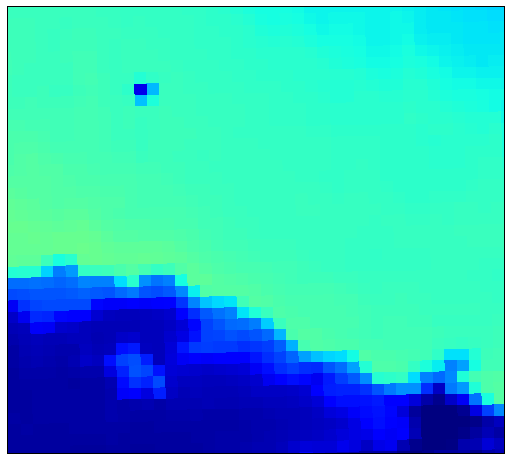

In [19]:
f = plt.figure(figsize = [15,8])
z = ncep_hrrr.variables['Planetary_boundary_layer_height_surface']
m = Basemap(llcrnrlon = llxlon,llcrnrlat = llylat, urcrnrlon = urxlon,
               urcrnrlat = urylat, projection = 'mill', area_thresh =1000,
               resolution='h')
x, y = m(lon, lat)
m.pcolormesh(x, y, z[0,0,:,:], vmin = None, vmax = None)
m.drawstates()
m.drawcoastlines(linewidth = 1.25)
m.drawparallels(np.linspace(10,50, 9) ,labels=[1,1,0,0])
m.drawmeridians(np.linspace(-110, -80,7),labels=[0,0,0,1]) 